## The Dynamic-Programming Algorithm

Assumptions:
The set of items I is sorted in non-descending order of weight, such that all([w_i <= w_(i+1) for i in I]). Consequently, as C_i = C-w_i, it follows that all([C_i >= C_(i+1) for i in I]).

In [23]:
import numpy as np

def MCMKP(I, p, w, C):
    '''
    Takes set of items I = {1,2,3...n}
    with Non-zero profit p and weights w for each
    And a total weight capacity for the knapsack C.
    Returns optimal solution value opt and required capacity cap
    '''
    #Initializing opt and cap to infinity
    opt = float('inf')
    cap = float('inf')
    
    #Initializing look-up vector for previous subproblems
    M = [float('inf')]*(C+1)
    M[0] = 0
        
    'Calculate i_c, the first item in I to exceed C'
    #The weight and price of the i first items in I
    W_i = 0
    P_i = 0
    
    #Checking for edge case where all items fit
    if sum(w)<=C:
        return sum(p), sum(w)
    
    #Until the set of items exceeds capacity
    else:
        for i in I:
            #add weight of the ith item to W_i
            W_i += w[i]
            P_i += p[i]
        
            #If it exceeds C
            if W_i > C:
            
                #record i_c
                i_c = i
            
                #Break the loop
                break
    
    
    'Main loop'
    for i in reversed(I):
        
        #iterating from i_c down to 0
        if i <= i_c:
            #Value at i_c calculated when finding i_c
            #Subtract current weight/price from previous iteration
            W_i -= w[i]
            P_i -= p[i]

            
            #Bounds of possible solutions
            C_ceil = max(0, C-W_i)
            C_floor = max(0, C-W_i-w[i])
            c_range = [i for i in range(C_floor, C_ceil+1)]

            #If best solution better than to previous best, update
            temp = min([M[k]+P_i for k in c_range])
            if temp < opt:
                cap = c_range[np.argmin([M[k]+P_i for k in c_range])]
                opt = temp
                
        #Update subsolutions
        for k in reversed(range(w[i], C+1)):
            M[k] = min(M[k], M[k-w[i]]+p[i])
        
    return opt, cap

# Emprical Complexity analysis

/Users/oscarengelbrektson/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


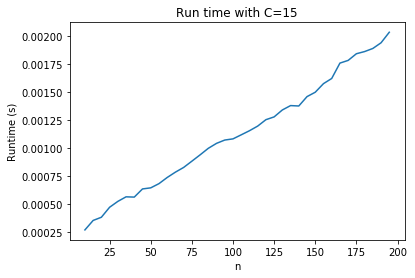

In [31]:
#Keeping C constant and varying n

import time
import numpy as np

solve_time = []
i = 10000 #Number of times to run random arrays of size n

#Fix C = 10
C = 15
ns = [n for n in range(10, 200, 5)]
for n in ns:
    solve_temp = 0
    for _ in range(i):
            
        #generate random inputs
        I = [i for i in range(n)]
        p = list(np.random.randint(0, 5, n))
        w = list(np.random.randint(0, 5, n))
        
        #Record run time
        start = time.time()
        MCMKP(I, p, w, C)
        end = time.time()
        solve_temp += (end - start)
    
    #Average the results over 10,000 runs 
    solve_time.append(solve_temp/i)

import matplotlib.pyplot as plt

plt.plot(ns,solve_time)

#Plot results
plt.title("Run time with C=15")
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.legend(loc=0)
plt.show()

/Users/oscarengelbrektson/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


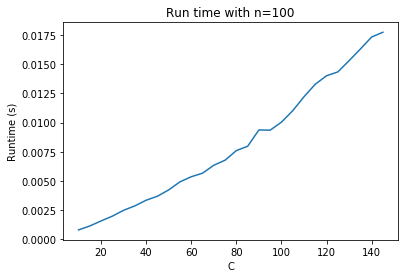

In [41]:
#Keeping n constant at n=100 and varying C
#C must be smaller than n to avoid frequent trivial solutions

import time
import numpy as np

solve_time = []
i = 10000 #Number of times to run random arrays of size n

#Fix n=100
I = [i for i in range(100)]
cs = [n for n in range(10, 150, 5)]
for c in cs:
    solve_temp = 0
    for _ in range(i):
            
        #generate random inputs
        p = list(np.random.randint(0, 5, 100))
        w = list(np.random.randint(0, 5, 100))
        
        #Binary merge_sort
        start = time.time()
        MCMKP(I, p, w, c)
        end = time.time()
        solve_temp += (end - start)
             
    solve_time.append(solve_temp/i)

import matplotlib.pyplot as plt

plt.plot(cs,solve_time)


plt.title("Run time with n=100")
plt.xlabel("C")
plt.ylabel("Runtime (s)")
plt.legend(loc=0)
plt.show()

# With tables

In [18]:
import numpy as np
import pandas as pd

def MCMKP_print(I, p, w, C):
    '''
    Takes set of items I = {1,2,3...n}
    with Non-zero profit p and weights w for each
    And a total weight capacity for the knapsack C.
    Returns optimal solution value opt and required capacity cap
    '''
    #Initializing opt and cap to infinity
    opt = float("inf")
    cap = float("inf")
    
    #Initializing look-up vector for previous subproblems
    M = [float("inf")]*(C+1)
    M[0] = 0
     
    table = []
    df = pd.DataFrame.from_records(table)
    Ms = []
    M_store = pd.DataFrame.from_records(Ms)
    C_floor_store = []
    C_ceil_store = []
    P_i_store = []
    W_i_store = []
    opt_store = []
    ojoj = []
        
    'Calculate i_c, the first item in I to exceed C'
    #The weight of the i first items in I
    W_i = 0
    #Until the set of items exceeds capacity
    for i in I:
        #add weight of the ith item to W_i
        W_i += w[i]
        
        #If it exceeds C
        if W_i > C:
            
            #record i_c
            i_c = i
            
            #Break the loop
            break
 
    'Main loop'
    for i in reversed(I):
        if i <= i_c:
            
            W_i = sum([w[j] for j in range(i+1)])
            P_i = sum([p[j] for j in range(i+1)])
            W_i_store.append(W_i)
            P_i_store.append(P_i)
            
            
            C_ceil = max(0, C-W_i)
            C_floor = max(0, C-W_i-w[i])
            C_ceil_store.append(C_ceil)
            C_floor_store.append(C_floor)
            
            c_range = [i for i in range(C_floor, C_ceil+1)]
            
            temp = min([M[k]+P_i for k in c_range])
            
            if temp < opt:
                cap = c_range[np.argmin([M[k]+P_i for k in c_range])]
                opt = temp
                
                opt_store.append(opt)

        
        for k in reversed(range(w[i], C+1)):
            M[k] = min(M[k], M[k-w[i]]+p[i])
        print(M) 
    C_ceil_store.append(C_ceil_store[-1]+1)
    opt_store.append(opt_store[-1])
    C_floor_store.append(C_floor_store[-1]+1)
    df["i"] = [i for i in range(5,0,-1)]
    df["C_floor"] = pd.Series(C_floor_store)
    df["C_ceil"] = pd.Series(C_ceil_store)
    df["P_i"] = pd.Series(P_i_store)
    df["W_i"] = pd.Series(W_i_store)
    df["OPT"] = pd.Series(opt_store)
    return df

In [20]:
I = [i for i in range(5)]
p = [3, 4, 6, 2, 1]
w = [1,1,2, 3, 4]
C = 5
MCMKP_print(I,p, w, C)

[0, inf, inf, inf, 1, inf]
[0, inf, inf, 2, 1, inf]
[0, inf, 6, 2, 1, 8]
[0, 4, 6, 2, 1, 5]
[0, 3, 6, 2, 1, 4]


,i,C_floor,C_ceil,P_i,W_i,OPT
0,5,0,0,15.0,7.0,15
1,4,0,1,13.0,4.0,13
2,3,2,3,7.0,2.0,9
3,2,3,4,3.0,1.0,4
4,1,4,5,NaN,NaN,4


In [ ]:
a = float("inf")
table = [[0, a, a, a, 1, a], 
         [0, a, a, 2, 1, a], 
         [0, a, 6, 2, 1, 8], 
         [0, 4, 6, 2, 1, 5], 
         [0, 3, 6, 2, 1, 4]]
table = pd.DataFrame(table)
table.round(0) #round() doesn't seem to be working. Probly because of inf values